In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

In [2]:
data = pd.read_csv("train.csv", encoding="UTF8")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [4]:
data.head(10)

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   
5      5      F   N       Y          2      270000.0               Working   
6      6      F   N       N          0      315000.0               Working   
7      7      M   N       Y          0      270000.0  Commercial associate   
8      8      M   Y       Y          1      180000.0  Commercial associate   
9      9      F   N       Y          0      103500.0               Working   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   
5  Secondary / secondary special         Married    House / apartment   
6  Secondary / secondary special       Separated    House / apartment   
7  Secondary / secondary special         Married    House / apartment   
8               Higher education         Married    House / apartment   
9  Secondary / secondary special         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   
5      -13413          -4996           1           0      0      1   
6      -17570          -1978           1           0      0      1   
7      -14896          -5420           1           0      0      1   
8      -15131          -1466           1           0      0      1   
9      -15785          -1308           1           0      0      0   

              occyp_type  family_size  begin_month  credit  
0                    NaN          2.0         -6.0     1.0  
1               Laborers          3.0         -5.0     1.0  
2               Managers          2.0        -22.0     2.0  
3            Sales staff          2.0        -37.0     0.0  
4               Managers          2.0        -26.0     2.0  
5  High skill tech staff          4.0        -18.0     1.0  
6             Core staff          1.0        -41.0     2.0  
7                Drivers          2.0        -53.0     0.0  
8                    NaN          3.0        -38.0     2.0  
9         Medicine staff          2.0         -5.0     2.0

In [5]:
data.shape

(26457, 20)

## 결측치 처리

In [6]:
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [7]:
# 결측치 비율 
(data.isnull().sum()/len(data))

index            0.000000
gender           0.000000
car              0.000000
reality          0.000000
child_num        0.000000
income_total     0.000000
income_type      0.000000
edu_type         0.000000
family_type      0.000000
house_type       0.000000
DAYS_BIRTH       0.000000
DAYS_EMPLOYED    0.000000
FLAG_MOBIL       0.000000
work_phone       0.000000
phone            0.000000
email            0.000000
occyp_type       0.308841
family_size      0.000000
begin_month      0.000000
credit           0.000000
dtype: float64

결측치가 데이터의 30%에 해당하므로 중앙값 혹은 평균으로 대체하고 모델을 생성한다면, 오히려 더 부정확한 결과를 가져올 수 있다고 생각된다. 때문에 또다른 모델을 생성하여 결측치를 예측하여 보완하거나 제거하는 것이 낫다고 생각한다.

In [8]:
# 1. 결측치를 제거하는 경우
data_1 = data.dropna(subset=['occyp_type'])

In [9]:
data_1.shape

(18286, 20)

In [10]:
# 2. 변수 자체를 제거하는 경우
data_2 = data.drop(columns=['occyp_type'])

In [11]:
data_2.shape

(26457, 19)

In [12]:
# 3. 또 다른 모델로 결측치를 예측하는 경우 (수치변수만 사용)

In [13]:
data_for_model = data
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [14]:
data_for_model.head()

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [15]:
#범주형 dummy 변환
data_for_model = pd.get_dummies(data_for_model, columns=['gender'])
data_for_model = pd.get_dummies(data_for_model, columns=['reality'])
data_for_model = pd.get_dummies(data_for_model, columns=['car'])
data_for_model = pd.get_dummies(data_for_model, columns=['child_num'])
data_for_model = pd.get_dummies(data_for_model, columns=['family_size'])
data_for_model = pd.get_dummies(data_for_model, columns=['edu_type'])
data_for_model = pd.get_dummies(data_for_model, columns=['family_type'])
data_for_model = pd.get_dummies(data_for_model, columns=['house_type'])
data_for_model = pd.get_dummies(data_for_model, columns=['income_type'])

In [16]:
data_for_model.head()

index  income_total  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  \
0      0      202500.0      -13899          -4709           1           0   
1      1      247500.0      -11380          -1540           1           0   
2      2      450000.0      -19087          -4434           1           0   
3      3      202500.0      -15088          -2092           1           0   
4      4      157500.0      -15037          -2105           1           0   

   phone  email   occyp_type  begin_month  ...  house_type_House / apartment  \
0      0      0          NaN         -6.0  ...                             0   
1      0      1     Laborers         -5.0  ...                             1   
2      1      0     Managers        -22.0  ...                             1   
3      1      0  Sales staff        -37.0  ...                             1   
4      0      0     Managers        -26.0  ...                             1   

   house_type_Municipal apartment  house_type_Office apartment  \
0                               1                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   house_type_Rented apartment  house_type_With parents  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   income_type_Commercial associate  income_type_Pensioner  \
0                                 1                      0   
1                                 1                      0   
2                                 0                      0   
3                                 1                      0   
4                                 0                      0   

   income_type_State servant  income_type_Student  income_type_Working  
0                          0                    0                    0  
1                          0                    0                    0  
2                          0                    0                    1  
3                          0                    0                    0  
4                          1                    0                    0  

[5 rows x 57 columns]

In [17]:
na_data = data_for_model[data_for_model['occyp_type'].isnull()]
na_data.shape

(8171, 57)

In [18]:
na_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8171 entries, 0 to 26453
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   8171 non-null   int64  
 1   income_total                            8171 non-null   float64
 2   DAYS_BIRTH                              8171 non-null   int64  
 3   DAYS_EMPLOYED                           8171 non-null   int64  
 4   FLAG_MOBIL                              8171 non-null   int64  
 5   work_phone                              8171 non-null   int64  
 6   phone                                   8171 non-null   int64  
 7   email                                   8171 non-null   int64  
 8   occyp_type                              0 non-null      object 
 9   begin_month                             8171 non-null   float64
 10  credit                                  8171 non-null   flo

In [19]:
target = na_data['occyp_type']
feature = na_data.drop(columns=['occyp_type','index','income_total'])

In [20]:
full_data = data_for_model[data_for_model['occyp_type'].notnull()]
full_data.shape

(18286, 57)

In [21]:
train_y = full_data['occyp_type']
train_x = full_data.drop(columns=['occyp_type','index','income_total'])

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)

pred = model.predict(feature)

In [23]:
#결측치 대체
na_data['occyp_type'] = pred

In [24]:
#원래 데이터 크기로 만들기 (na_data + full_data)
data_after = pd.concat([na_data,full_data])
data_after.shape

(26457, 57)

## 유의미한 시각화 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [26]:
%matplotlib inline

<AxesSubplot:xlabel='gender', ylabel='count'>

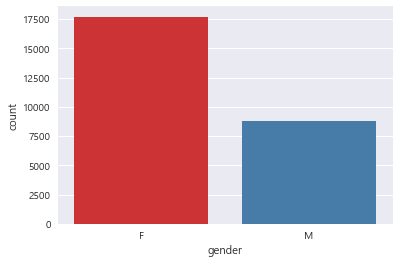

In [27]:
# 1. gender 비율 
sns.countplot(x='gender',palette='Set1', data = data, hue=None)

In [28]:
# 위의 그래프를 보아 여성의 비율이 남성의 2배임을 알 수 있다.

<AxesSubplot:xlabel='family_size', ylabel='count'>

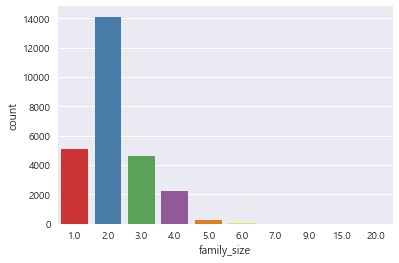

In [29]:
#2. family_size 비율
sns.countplot(x='family_size',palette='Set1', data = data, hue=None)

In [30]:
# family_size가 2인 행이 눈에띄게 빈번함을 알 수 있다.

<AxesSubplot:xlabel='credit', ylabel='count'>

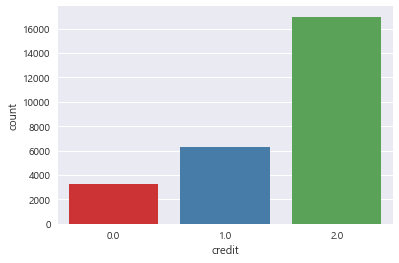

In [31]:
#3. credit 비율
sns.countplot(x='credit',palette='Set1', data = data, hue=None)

In [32]:
#credit을 가지고 있는 비율이 없는 비율보다 높음을 볼 수 있다. 
#특히, 2일 확률은 0일 확률의 약 7배이다.

<AxesSubplot:xlabel='gender', ylabel='income_total'>

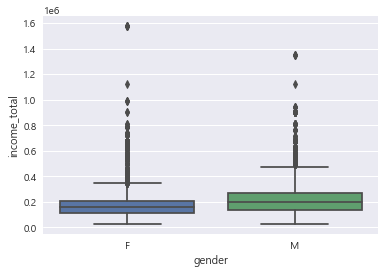

In [33]:
#4. income_total _ gender
sns.boxplot(x='gender',y='income_total',data=data)

In [34]:
# 여성에 비해 남성의 income_total이 상대적으로 높은 것을 볼 수 있다.

<AxesSubplot:xlabel='edu_type', ylabel='income_total'>

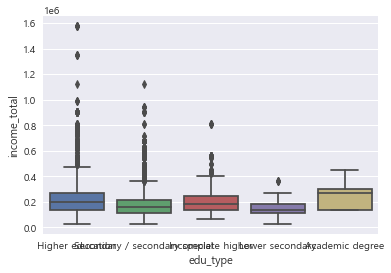

In [35]:
#5. income_total _ edu_type
sns.boxplot(x='edu_type',y='income_total',data=data)

In [36]:
# Higher education의 범주가 다른 범주들에 비해 분산도 크고, 이상치가 많음을 볼 수 있다.

<AxesSubplot:xlabel='income_type', ylabel='income_total'>

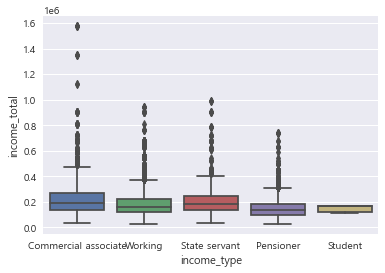

In [37]:
#6. income_type _income_total
sns.boxplot(x='income_type',y='income_total',data=data)

In [38]:
#student 범주가 다른 범주에 비해 분산과 평균이 작다는 것을 볼 수 있다.

<AxesSubplot:xlabel='house_type', ylabel='income_total'>

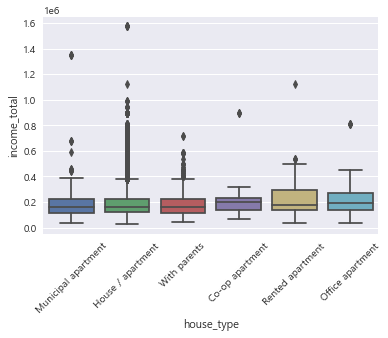

In [39]:
#7. house_type _income_total
plt.xticks(rotation=45)
sns.boxplot(x='house_type',y='income_total',data=data)

In [40]:
#House/apartment가 다른 범주에 비해 눈에 띄게 이상치가 많음을 볼 수 있다.

In [41]:
data.head()

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [42]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

## 수치형 변수 간 상관관계 파악

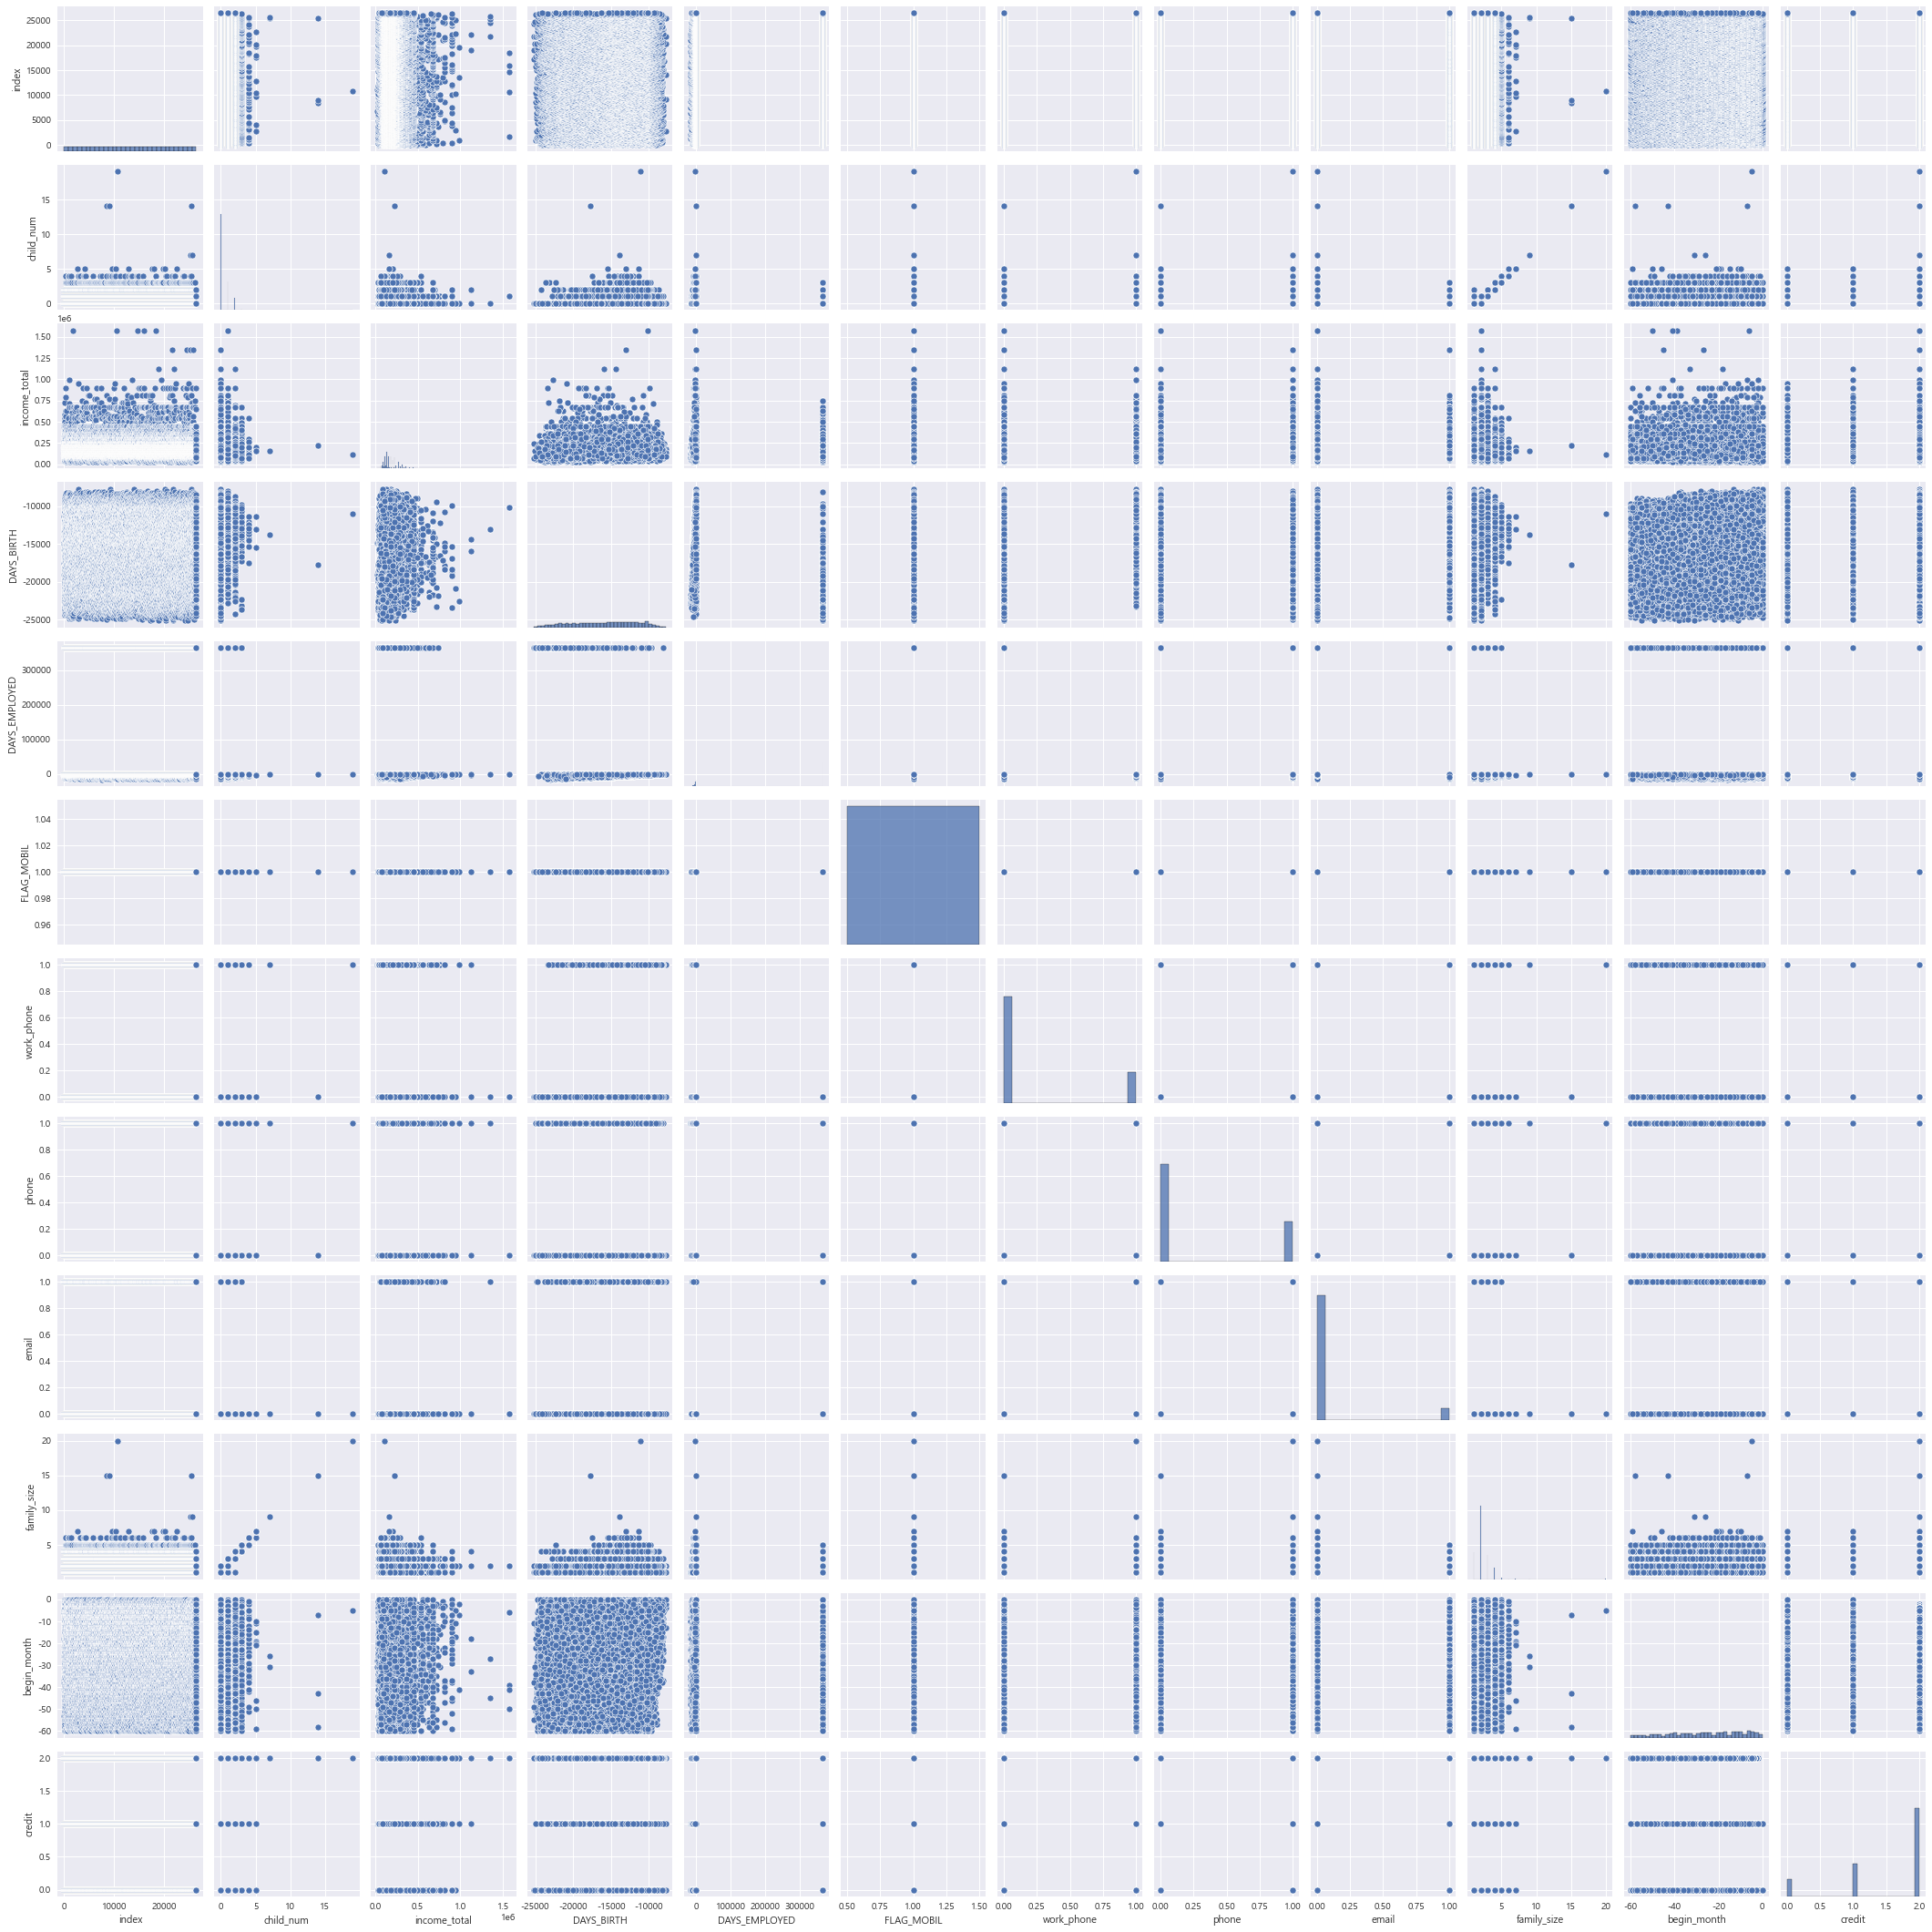

In [43]:
sns.pairplot(data, diag_kind='hist')

plt.show()


In [44]:
# 위 산점도 행렬을 보았을 때, 상관관계가 눈에 띄게 보이는 변수 쌍은 family_size와 child_num 변수이다. 이를 크게 그려보면 아래의 그림과 같이 
# 뚜렷한 선형성이 보이는 것을 알 수 있다.

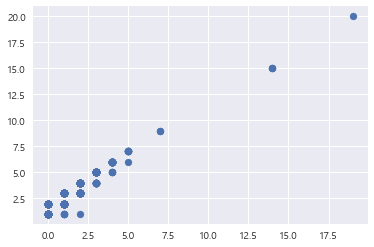

In [45]:
plt.scatter(x='child_num',y='family_size',data=data)

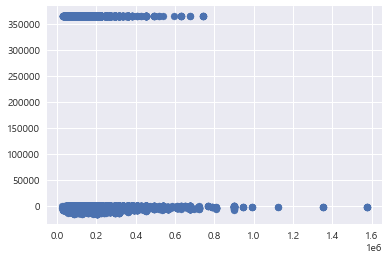

In [46]:
# 일반적으로 생각했을 때 income_total 변수가 DAYS_EMPLOYED 변수와 연관이 있을 것이라고 생각되기 때문에 그려보면 다음과 같다
plt.scatter(x='income_total',y='DAYS_EMPLOYED',data=data)

In [47]:
# income_type 변수를 참고했을 때, 연금 수령자도 포함되어 있는 것을 보아 근무 일수가 0이어도 높은 수입이 있을 수 있다고 볼 수 있다.

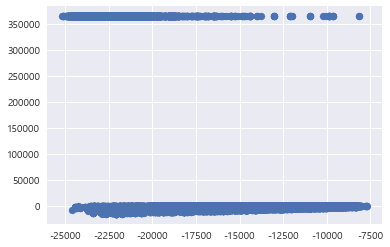

In [48]:
plt.scatter(x='DAYS_BIRTH',y='DAYS_EMPLOYED',data=data)

## 파생변수 생성

In [49]:
# 본 예제에서 연관이 있다고 생각되는 변수 쌍이 한 쌍밖에 없기 때문에, 파생변수의 필요성이 크다고 생각되지 않는다. 하지만, 근속일수에 따른 
# 수입 (income_total/ DAYS_EMPLOYED) 혹은 가족 중 어른의 비율 (1-child_num/family_size) 등의 변수를 생각해 볼 수 있다.

In [50]:
#1. 근속 일수에 따른 수입

data['income_by_days'] = data['income_total']/data['DAYS_EMPLOYED']
data['income_by_days']

0         -43.002761
1        -160.714286
2        -101.488498
3         -96.797323
4         -74.821853
            ...     
26452    -113.407258
26453     -72.727273
26454    -145.161290
26455   -1598.130841
26456     -79.960513
Name: income_by_days, Length: 26457, dtype: float64

In [51]:
# 2. 가족 중 어른의 비율
data['adult_prob'] = 1-data['child_num']/data['family_size']
data['adult_prob']

0        1.000000
1        0.666667
2        1.000000
3        1.000000
4        1.000000
           ...   
26452    0.500000
26453    0.500000
26454    1.000000
26455    1.000000
26456    1.000000
Name: adult_prob, Length: 26457, dtype: float64

In [52]:
import pandas as pd
import pandas_profiling

pr = data.profile_report()
pr